In [51]:
import numpy as np
import pandas as pd
from openpyxl import Workbook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [52]:
length = 1000
size_1 = np.arange(-10, 10, 0.5)
std_1 = 0.2
size_2 = np.arange(-10, 10, 1)
std_2 = 1

rows = []

for j in range(len(size_2)):
    for i in size_1:
        for _ in range(length):
            rows.append([j, i, std_1, size_2[j], std_2])

df = pd.DataFrame(rows, columns=["trials", "S1_val", "S1_std", "S2_val", "S2_std"])

filename = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\test_complet.csv"
df.to_csv(filename, index=False)

print("Fichier généré :", filename)


Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet.csv


In [81]:
def psycometrique(data_tuple,var2, nb_psycho):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 41           # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  
    for l in range(nb_psycho-1):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*l + i : size_one_block*l + i + block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*l + i : size_one_block*l + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
        
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)  
    number_of_psycho = df['Trial'].to_numpy()
    number_of_psycho = pd.unique(number_of_psycho)
    return list(var2), len(list(number_of_psycho))         


def ploter(mean_used_all, mean_res_all,i):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.5
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")
    x_vals, y_vals = mean_used_all, mean_res_all
    # tracer la courbe
    line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = 1')
    color = line.get_color()

    # --- recherche du passage par 0.5 ---
    x_cross = None
    print(x_vals, y_vals)
    print("xval")
    for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1], x_vals[1:], y_vals[1:]):
        if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
            x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
            break

    if x_cross is not None:
        ax.scatter([x_cross], [seuil], color=color, zorder=5)
        ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                    color=color, ha='center', va='bottom', fontsize=8)
        print(f'Bloc {i} : x = {x_cross:.3f}')
    else:
        print(f'Bloc {i} : pas de croisement avec 0.5')

    x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S2 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show()

    return x_stars


def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple



def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2, nb_psycho = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2, nb_psycho)
    for i in range(len(array_mean_result)):
        x_stars = ploter(array_mean_used[i], array_mean_result[i],i)

    print("x_stars :", x_stars)
    return x_stars

test
800000
=== Points d'intersection avec P = 0.5 ===
[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0] [0.001, 0.001, 0.003, 0.011, 0.026, 0.072, 0.175, 0.325, 0.487, 0.641, 0.814, 0.909, 0.952, 0.985, 0.994, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
xval
Bloc 0 : x = -5.958


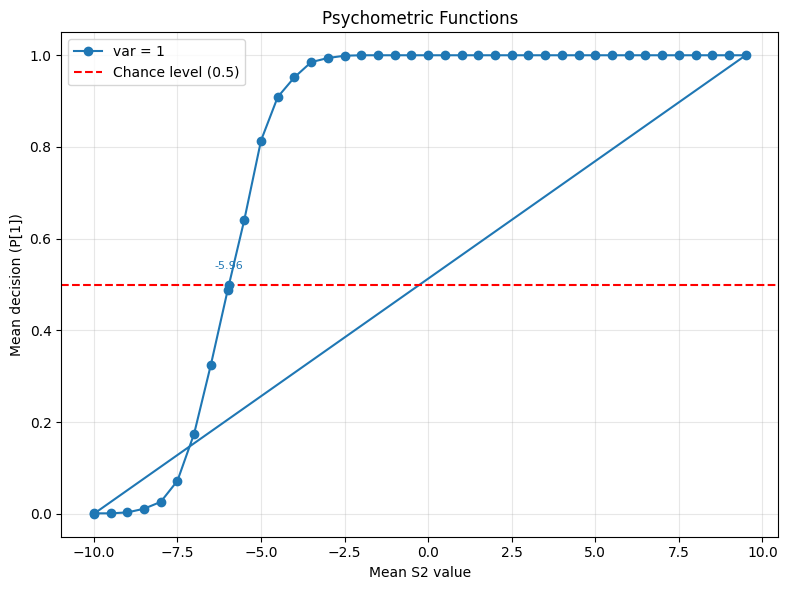

=== Points d'intersection avec P = 0.5 ===
[-9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5] [0.0, 0.0, 0.002, 0.004, 0.03, 0.09, 0.165, 0.293, 0.455, 0.659, 0.793, 0.895, 0.949, 0.976, 0.997, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
xval
Bloc 1 : x = -5.390


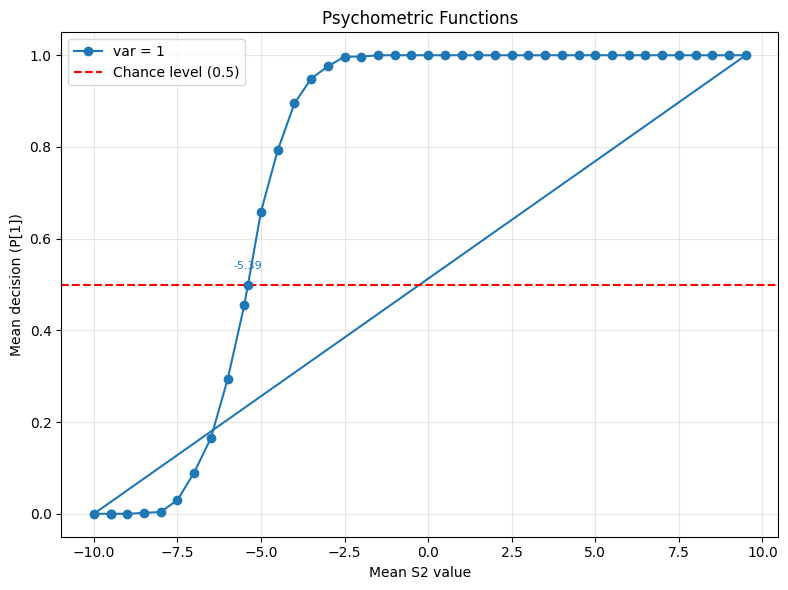

=== Points d'intersection avec P = 0.5 ===
[-9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0] [0.0, 0.0, 0.0, 0.009, 0.032, 0.067, 0.131, 0.261, 0.459, 0.568, 0.783, 0.878, 0.955, 0.97, 0.991, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
xval
Bloc 2 : x = -4.812


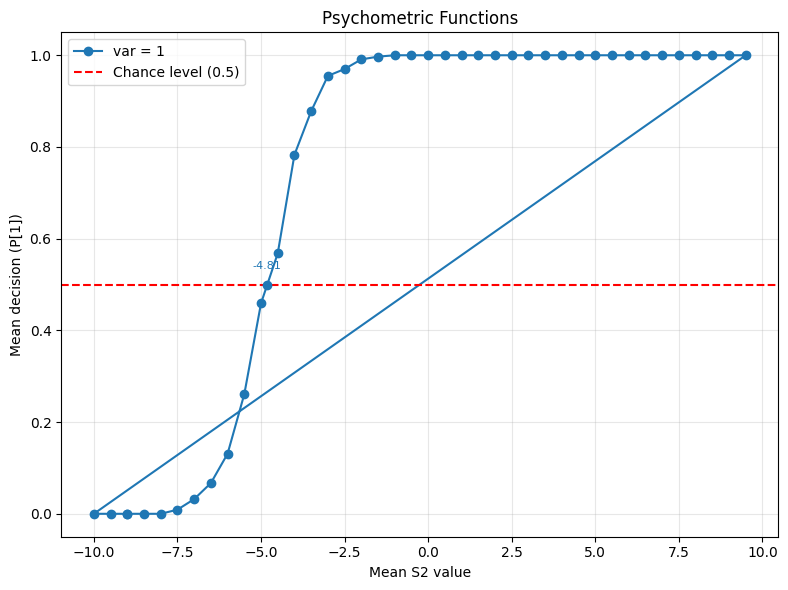

=== Points d'intersection avec P = 0.5 ===
[-8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5] [0.0, 0.0, 0.001, 0.005, 0.025, 0.037, 0.126, 0.232, 0.382, 0.558, 0.734, 0.868, 0.929, 0.977, 0.998, 0.999, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 3 : x = -4.165


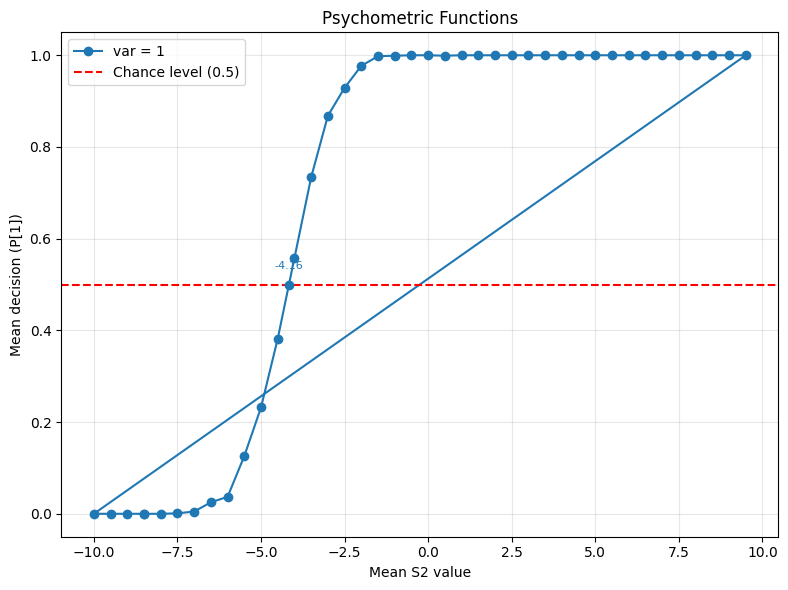

=== Points d'intersection avec P = 0.5 ===
[-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0] [0.0, 0.0, 0.0, 0.003, 0.02, 0.045, 0.123, 0.204, 0.339, 0.537, 0.702, 0.834, 0.916, 0.973, 0.993, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 4 : x = -3.593


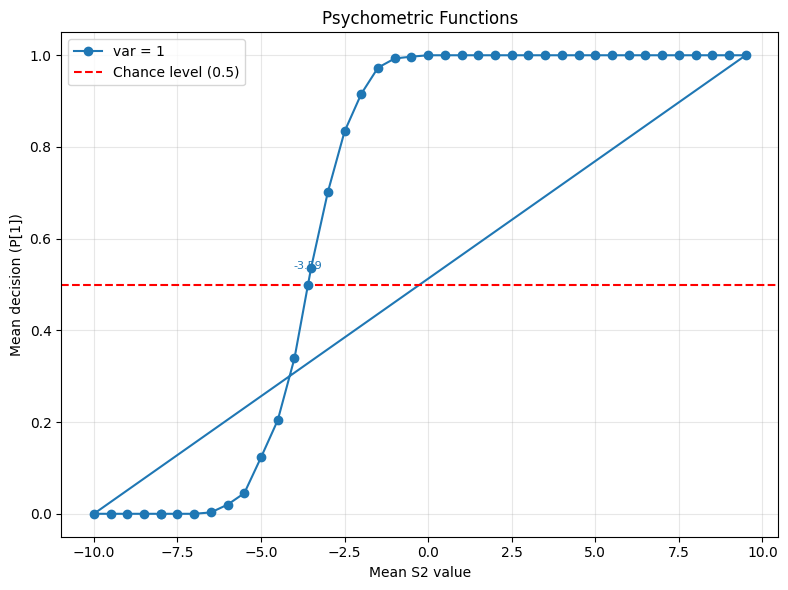

=== Points d'intersection avec P = 0.5 ===
[-7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5] [0.0, 0.0, 0.0, 0.004, 0.016, 0.03, 0.103, 0.192, 0.338, 0.498, 0.688, 0.821, 0.919, 0.966, 0.988, 0.998, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 5 : x = -2.995


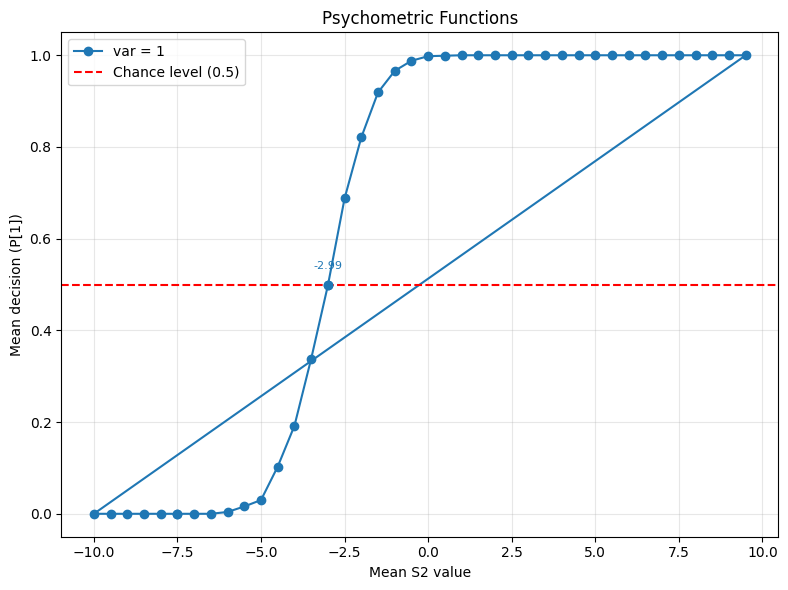

=== Points d'intersection avec P = 0.5 ===
[-7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0] [0.0, 0.0, 0.0, 0.003, 0.012, 0.037, 0.075, 0.155, 0.321, 0.495, 0.665, 0.803, 0.91, 0.959, 0.988, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 6 : x = -2.485


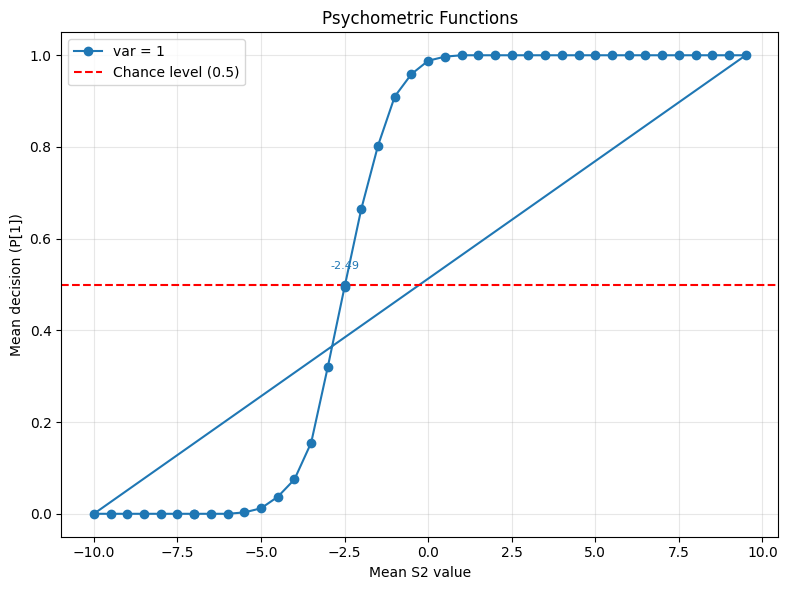

=== Points d'intersection avec P = 0.5 ===
[-6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5] [0.0, 0.0, 0.001, 0.005, 0.014, 0.02, 0.069, 0.137, 0.279, 0.454, 0.628, 0.787, 0.905, 0.961, 0.99, 0.994, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 7 : x = -1.868


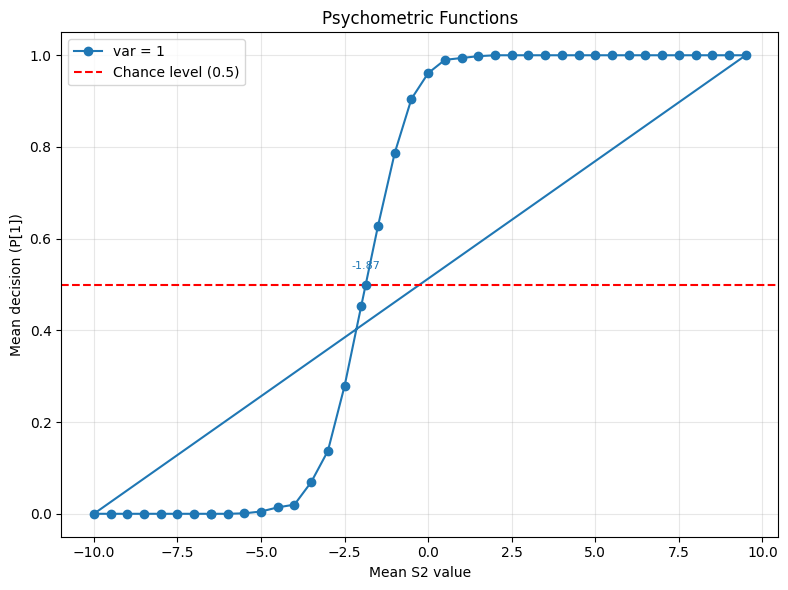

=== Points d'intersection avec P = 0.5 ===
[-6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0] [0.0, 0.0, 0.0, 0.0, 0.01, 0.024, 0.047, 0.145, 0.275, 0.418, 0.597, 0.76, 0.866, 0.951, 0.985, 0.997, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 8 : x = -1.271


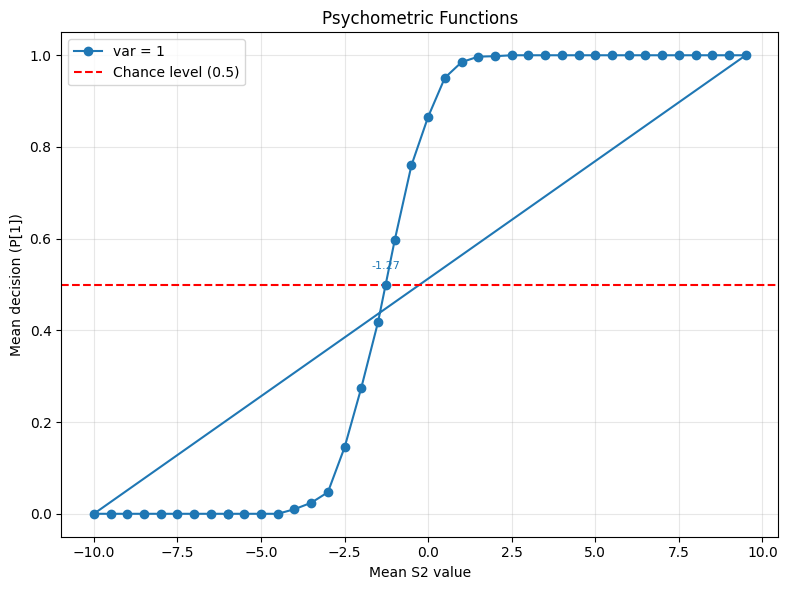

=== Points d'intersection avec P = 0.5 ===
[-5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5] [0.0, 0.001, 0.0, 0.0, 0.005, 0.022, 0.058, 0.132, 0.245, 0.393, 0.555, 0.736, 0.875, 0.946, 0.979, 0.993, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 9 : x = -0.670


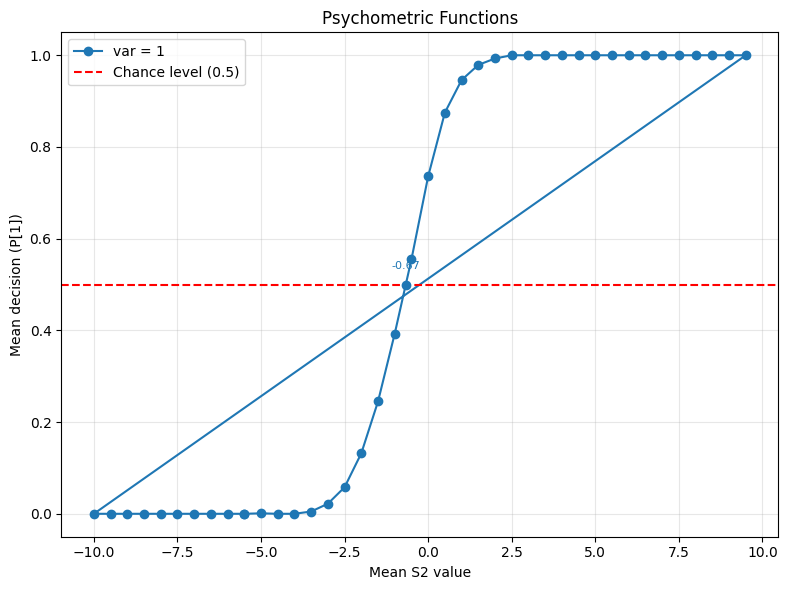

=== Points d'intersection avec P = 0.5 ===
[-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0] [0.0, 0.0, 0.0, 0.001, 0.005, 0.019, 0.042, 0.094, 0.214, 0.37, 0.537, 0.706, 0.857, 0.932, 0.971, 0.988, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 10 : x = -0.111


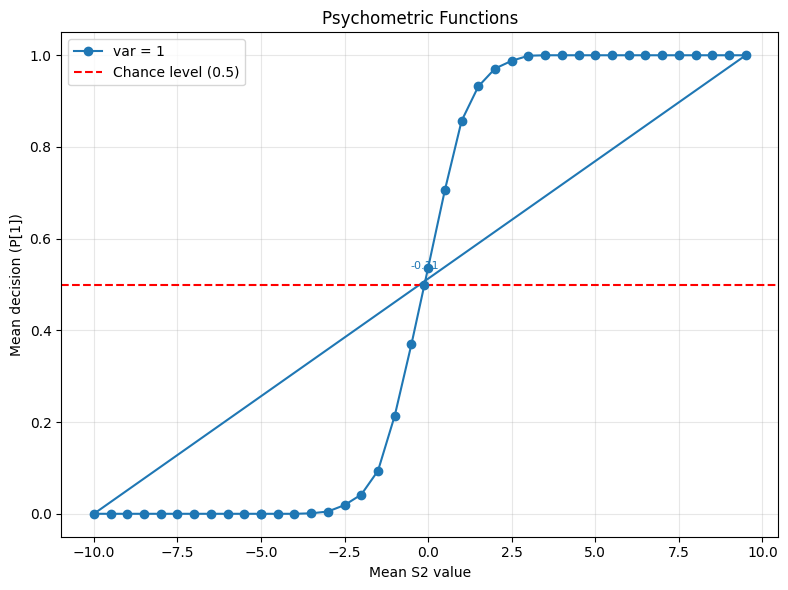

=== Points d'intersection avec P = 0.5 ===
[-4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5] [0.0, 0.0, 0.0, 0.0, 0.007, 0.017, 0.04, 0.084, 0.186, 0.308, 0.509, 0.687, 0.812, 0.929, 0.959, 0.991, 0.999, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 11 : x = 0.478


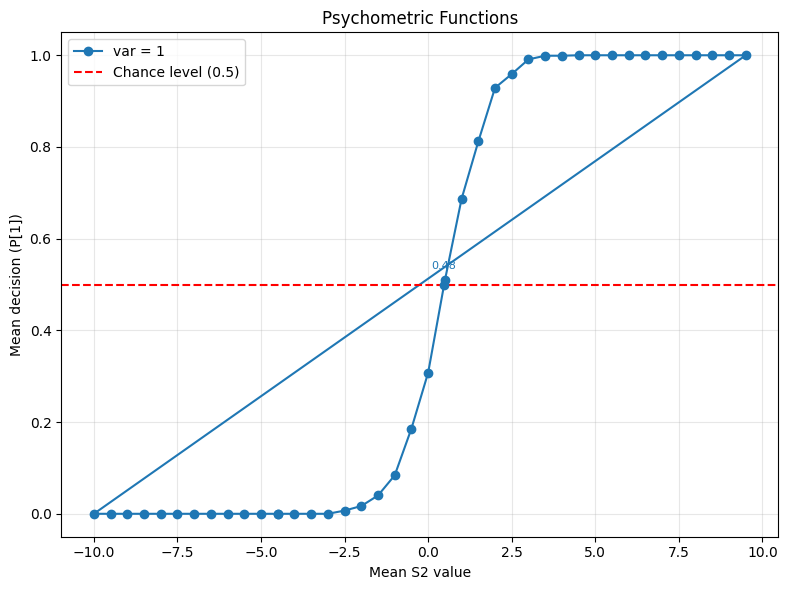

=== Points d'intersection avec P = 0.5 ===
[-4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0] [0.0, 0.0, 0.0, 0.0, 0.003, 0.009, 0.034, 0.069, 0.141, 0.312, 0.473, 0.625, 0.803, 0.879, 0.959, 0.985, 0.999, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 12 : x = 1.089


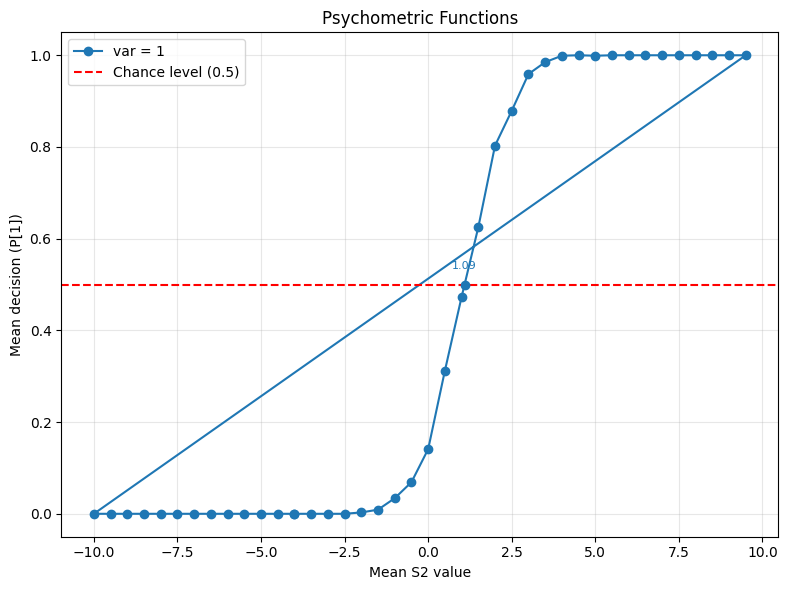

=== Points d'intersection avec P = 0.5 ===
[-3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5] [0.0, 0.0, 0.0, 0.0, 0.002, 0.009, 0.017, 0.073, 0.168, 0.283, 0.439, 0.618, 0.8, 0.876, 0.958, 0.986, 0.995, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 13 : x = 1.670


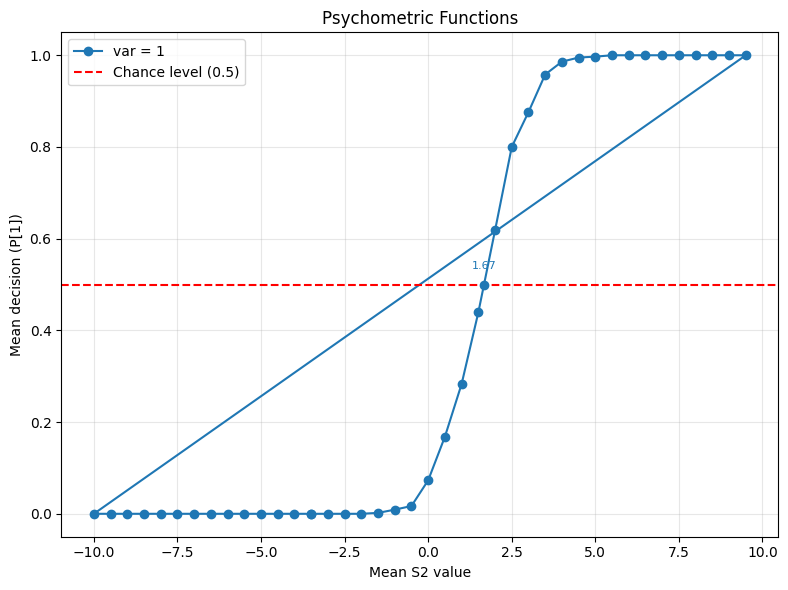

=== Points d'intersection avec P = 0.5 ===
[-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0] [0.0, 0.0, 0.0, 0.0, 0.002, 0.005, 0.016, 0.053, 0.125, 0.243, 0.43, 0.622, 0.766, 0.871, 0.944, 0.977, 0.992, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 14 : x = 2.182


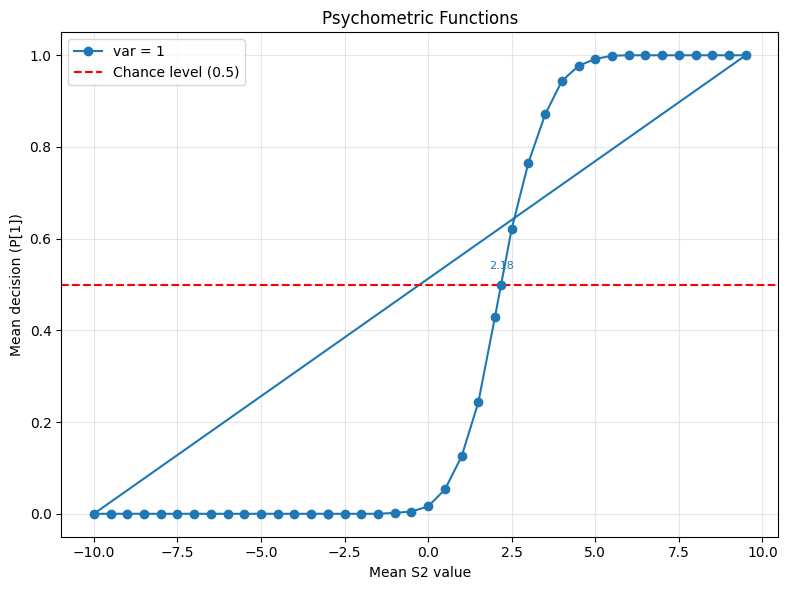

=== Points d'intersection avec P = 0.5 ===
[-2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5] [0.0, 0.0, 0.0, 0.0, 0.003, 0.005, 0.016, 0.043, 0.119, 0.234, 0.389, 0.57, 0.745, 0.863, 0.928, 0.971, 0.992, 0.999, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 15 : x = 2.807


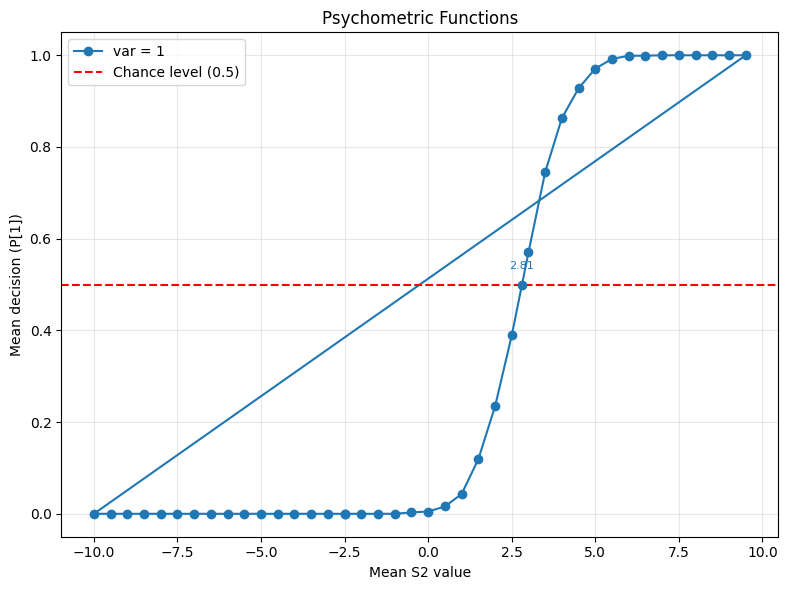

=== Points d'intersection avec P = 0.5 ===
[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0] [0.0, 0.0, 0.0, 0.0, 0.002, 0.005, 0.013, 0.039, 0.105, 0.206, 0.348, 0.517, 0.712, 0.85, 0.913, 0.966, 0.996, 0.998, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 16 : x = 3.450


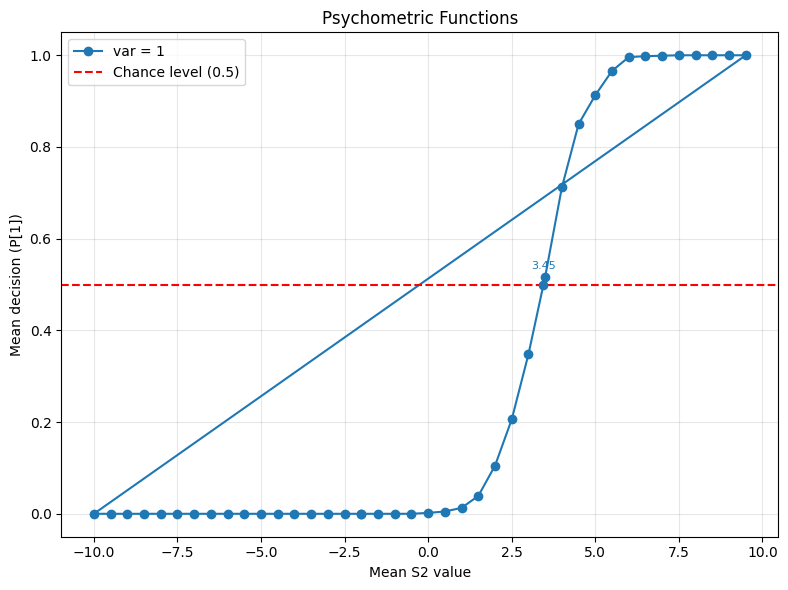

=== Points d'intersection avec P = 0.5 ===
[-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5] [0.0, 0.0, 0.0, 0.0, 0.002, 0.003, 0.016, 0.039, 0.091, 0.185, 0.347, 0.513, 0.697, 0.824, 0.908, 0.968, 0.986, 0.999, 0.999, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 17 : x = 3.961


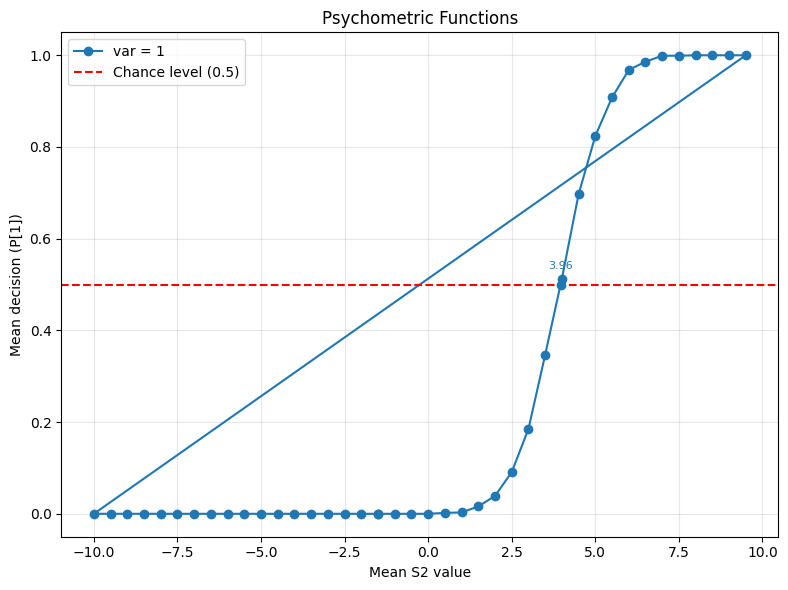

=== Points d'intersection avec P = 0.5 ===
[-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.007, 0.027, 0.08, 0.16, 0.315, 0.485, 0.633, 0.776, 0.92, 0.956, 0.985, 0.995, 0.999, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
xval
Bloc 18 : x = 4.551


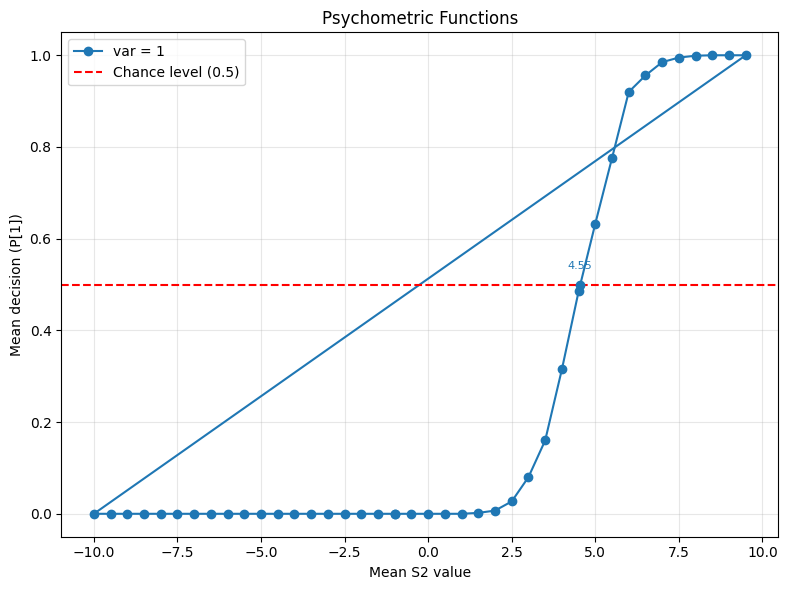

x_stars : [4.550675675675675]


ValueError: not enough values to unpack (expected 2, got 1)

In [82]:
inverser = True
file = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\experiment_results_test_complet.csv"
slope, x_star = main(file_path=file, inverser=inverser)
print(x_star)
    
    

In [86]:
length = 1000

size_1 = np.arange(-10, 10.2, 0.5)   
std_1 = 0.2

# S2_val de -10 à 10 en pas de 1
size_2 = np.arange(-10, 10.1, 1)
std_2 = 1

for j, s2 in enumerate(size_2):
    rows = []  # on réinitialise pour chaque fichier

    for s1 in size_1:
        for trial in range(length):
            # trial = numéro d’essai (0 à 999)
            rows.append([trial, s1, std_1, s2, std_2])

    df = pd.DataFrame(rows, columns=["trials", "S1_val", "S1_std", "S2_val", "S2_std"])

    filename = rf"C:\Users\gabri\Desktop\bayesian\test\test_complet{j}.csv"
    df.to_csv(filename, index=False)

    print("Fichier généré :", filename)


Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet0.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet1.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet2.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet3.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet4.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet5.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet6.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet7.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet8.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet9.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet10.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet11.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet12.csv
Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_co